# Projeto Final - Supercomputação 2020.2
#### Isabella Rocha de Oliveira - Engenharia da Computação - 2ª turma

## Comparação de algoritmos diferentes para o problema do caixeiro viajante

O problema do caixeiro viajante é um problema de otimização combinatória com complexidade NP-difícil e ele é bastante estudado por pesquisadores e cientistas por ser um problema de otimização difícil. Ele será utilizado neste estudo para apresentar como diferentes métodos podem resolver este problema para entradas diferentes, com diferentes _corretudes_ dos resultados e diferentes tempos de execução.

### Descrição do problema

Dadas N cidades, escolher um caminho fechado (tour) tal que:
- Cada cidade é visitada somente uma vez
- O caminho é o mais curto possível

### Métodos estudados

- Heurística da cidade mais próxima
- Busca local sequencial
- Busca local paralela
- Busca local GPU 
- Busca Exaustiva

**Heurística da cidade mais próxima:** Heurística é um "truque" usado para resolver um problema rapidamente. Neste caso, o truque usado é o de escolher sempre a cidade mais próxima não visitada, começando sempre na primeira cidade. Com este algoritmo nem sempre é obtido um resultado ótimo, mas pode-se obter ganhos de curto prazo e resultados aproximados.

**Busca local:** Trata-se de começar com um tour aleatório e verificar se é possível alternar a ordem de visitação entre duas cidades e com isso conseguir um tour de menor distância. Essa troca de posições é repetida sucessivamente até que nenhuma troca possível possibilite um tour com distância menor. 
A implementação desse algoritmo na forma **sequencial** é quando todos os comandos do código são rodados em sequência, um de cada vez. 
A implementação **paralela** foi feita com a biblioteca OpenMP e possibilitou que todos os cores da máquina sejam usados ao mesmo tempo para que tarefas do código sejam executadas simultâneamente para economizar tempo, mas gerando o mesmo valor da implementação sequencial.
A implementação para **GPU** foi feita com a biblioteca Thrust e ela também permite que tarefas sejam executadas simultâneamente, o que resulta em economia de tempo gerando o mesmo valor da implementação sequencial.

**Busca exaustiva:** Nessa implementação todos os tours possíveis são testados por meio de um algoritmo recursivo e a menor distância é retornada. Os possíveis tours são construídos tomando a decisão de incluir ou não uma determinada cidade em uma determinada posição do tour, e isso é repetido para todas as cidades até formar o tour completo.

### Testes e comparações
Todos os testes deste estudo serão realizados na mesma máquina para que não haja nenhuma interferência de especificações de hardware diferentes que possa prejudicar as comparações. As especificações da máquina da AWS onde os testes foram rodados são as seguintes:

- g3s.xlarge
- 1 GPU de 8 GB
- 4 CPUs
- 30.5 GB
- 2.3 GHz (base) e 2.7 GHz (turbo) Intel Xeon E5-2686 v4 Processor


Este estudo tem como objetivo responder algumas perguntas que serão apresentadas a seguir, e para isso foram realizados os seguintes testes:
- Comparação dos tempos de execução dos 5 métodos com entradas pequenas
- Comparação dos tempos de execução de 4 dos métodos com entradas médias (a busca exaustiva não foi comparada neste teste)
- Comparação dos resultados obtidos pelos 5 métodos com entradas pequenas com a finalidade de identificar a qualidade das respostas obtidas.
- Comparação dos tempos de execução da busca local paralela e da busca local para GPU com entradas pequenas, médias e grandes.
- Comparação dos tempos de execução para diferentes entradas com a busca exaustiva

**Para replicar os testes realizados neste estudo** basta executar as células deste relatório, em sequência.

## Se você pudesse escolher um método para resolver este problema, qual seria?

Se eu pudesse escolher um método para resolver este problema, eu escolheria o de *busca local paralela*, pois ele entrega resultados de qualidade superior ao do método com heurística (com valores próximos do da busca exaustiva), e trabalha em menos tempo que os métodos de buscas locais sequencial e para GPU, e busca exaustiva para tamanhos de entradas pequenos, médios e grandes. Os testes a seguir apresentam resultados que permitiram chegar à essa conclusão.

In [3]:
import subprocess
import time
def roda_com_entrada(execut, arq):
    with open(arq) as f:
        start = time.perf_counter()
        proc = subprocess.run([execut], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return proc.stdout, end - start

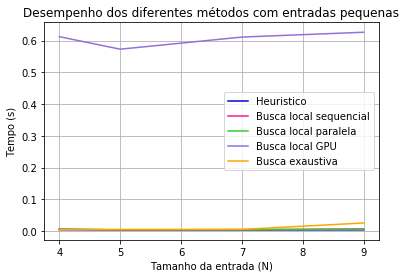

In [4]:
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

directory_name = "Teste1"
executH = "./heuristico"
executBls = "./busca-local-sequencial"
executBlp = "./busca-local-paralela"
executBlg = "./busca-local-gpu"
executBe = "./busca-exaustiva"


tamanhos = [4, 5, 7, 9]
tempoH = []
tempoBls = []
tempoBlp = []
tempoBlg = []
tempoBe = []
resultadosH = []
resultadosBls = []
resultadosBlp = []
resultadosBlg = []
resultadosBe = []

for i in range(4):
    filename = 'in-' + str(i) + '.txt'
    saida = roda_com_entrada(executH, os.path.join(directory_name, filename))
    tempoH.append(saida[1])
    resultadosH.append(saida[0])
    
    saida = roda_com_entrada(executBls, os.path.join(directory_name, filename))
    tempoBls.append(saida[1])
    resultadosBls.append(saida[0])
    
    saida = roda_com_entrada(executBlp, os.path.join(directory_name, filename))
    tempoBlp.append(saida[1])
    resultadosBlp.append(saida[0])
    
    saida = roda_com_entrada(executBlg, os.path.join(directory_name, filename))
    tempoBlg.append(saida[1])
    resultadosBlg.append(saida[0])
    
    saida = roda_com_entrada(executBe, os.path.join(directory_name, filename))
    tempoBe.append(saida[1])
    resultadosBe.append(saida[0])
        
plt.plot(tamanhos, tempoH, color='mediumblue', label='Heuristico')
plt.plot(tamanhos, tempoBls, color='deeppink', label='Busca local sequencial')
plt.plot(tamanhos, tempoBlp, color='limegreen', label='Busca local paralela')
plt.plot(tamanhos, tempoBlg, color='mediumpurple', label='Busca local GPU')
plt.plot(tamanhos, tempoBe, color='orange', label='Busca exaustiva')
plt.title('Desempenho dos diferentes métodos com entradas pequenas')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste1.png")
plt.grid()
plt.legend()
plt.show()

O gráfico apresentado anteriormente relaciona diferentes tamanhos de entradas com o tempo de execução do programa, para os 5 diferentes métodos estudados que encontram uma solução para o problema do caixeiro viajante. Ele revela que o método de busca local para GPU demora mais de 6 vezes mais que os outros métodos para todas as entradas pequenas testadas. Isso acontece porque existe um custo fixo para trabalhar com vetores em GPU e para os casos como esse, em que uma quantidade pequena de dados é trabalhada, o tempo gasto é mais alto que o dos demais métodos, portanto não vale a pena utilizar a GPU.

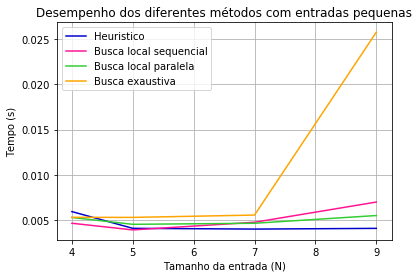

In [5]:
plt.plot(tamanhos, tempoH, color='mediumblue', label='Heuristico')
plt.plot(tamanhos, tempoBls, color='deeppink', label='Busca local sequencial')
plt.plot(tamanhos, tempoBlp, color='limegreen', label='Busca local paralela')
#plt.plot(tamanhos, tempoBlg, color='mediumpurple', label='Busca local GPU')
plt.plot(tamanhos, tempoBe, color='orange', label='Busca exaustiva')
plt.title('Desempenho dos diferentes métodos com entradas pequenas')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste1-2.png")
plt.grid()
plt.legend()
plt.show()

Este gráfico, assim como o anterior, apresenta a mesma relação Tamanho de entrada por Tempo, porém sem considerar o método de busca local para GPU, para possibilitar uma melhor visualização das curvas formadas pelos outros métodos. É possível perceber que a partir da entrada de tamanho 9 o método de busca exaustiva apresenta um tempo de execução maior do que dos outros métodos, e a tendência é que para entradas maiores este tempo crescerá ainda mais. Portanto é possível concluir que para entradas pequenas (até 7 cidades) os 4 métodos dão uma resposta rápida para o problema, mas para entradas maiores o tempo da busca exaustiva será muito maior do que os dos outros 3 métodos.

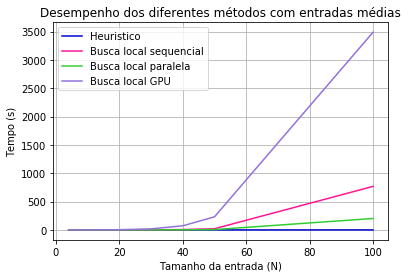

In [6]:
directory_name = "Teste2"
executH = "./heuristico"
executBls = "./busca-local-sequencial"
executBlp = "./busca-local-paralela"
executBlg = "./busca-local-gpu"

tamanhos = [4, 5, 7, 9, 20, 30, 40, 50, 100]

for i in range(5):
    filename = 'in-' + str(i) + '.txt'
    saida = roda_com_entrada(executH, os.path.join(directory_name, filename))
    tempoH.append(saida[1])
    #resultadosH.append(saida[0])
    saida = roda_com_entrada(executBls, os.path.join(directory_name, filename))
    tempoBls.append(saida[1])
    #resultadosBls.append(saida[0])
    saida = roda_com_entrada(executBlp, os.path.join(directory_name, filename))
    tempoBlp.append(saida[1])
    #resultadosBlp.append(saida[0])
    saida = roda_com_entrada(executBlg, os.path.join(directory_name, filename))
    tempoBlg.append(saida[1])
    #resultadosBlg.append(saida[0])
        
plt.plot(tamanhos, tempoH, color='mediumblue', label='Heuristico')
plt.plot(tamanhos, tempoBls, color='deeppink', label='Busca local sequencial')
plt.plot(tamanhos, tempoBlp, color='limegreen', label='Busca local paralela')
plt.plot(tamanhos, tempoBlg, color='mediumpurple', label='Busca local GPU')

plt.title('Desempenho dos diferentes métodos com entradas médias')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste2.png")
plt.grid()
plt.legend()
plt.show()

Neste gráfico, as entradas de tamanhos médios (20, 30, 40 e 50) e de tamanho grande (100) foram adicionadas na relação Tamanho da entrada por Tempo de execução. É possível analisar que a busca local para GPU novamente precisou de um tempo de execução maior para encontrar o resultado final do que os demais métodos, portanto não seria interessante utilizar o método de busca local para GPU em casos de entradas de tamanhos médios. Para este teste não foi calculado o tempo com a busca exaustiva, porque para entradas maiores do que 14 o tempo de espera até a obtenção do resultado é muito mais alto do que o dos demais métodos.

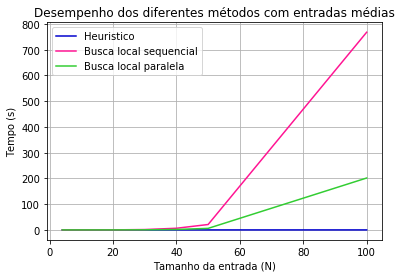

In [7]:
plt.plot(tamanhos, tempoH, color='mediumblue', label='Heuristico')
plt.plot(tamanhos, tempoBls, color='deeppink', label='Busca local sequencial')
plt.plot(tamanhos, tempoBlp, color='limegreen', label='Busca local paralela')
#plt.plot(tamanhos, tempoBlg, color='mediumpurple', label='Busca local GPU')

plt.title('Desempenho dos diferentes métodos com entradas médias')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste2-2.png")
plt.grid()
plt.legend()
plt.show()

Neste gŕafico há a mesma relação Tamanho de entrada (incluindo entradas pequenas e médias) por Tempo, porém sem a curva da busca local para GPU e sem a curva da busca exaustiva. Aqui é possível ver que a partir da entrada de tamanho 20 as buscas locais sequencial e paralela começam a demorar mais do que para entradas menores para obterem um resultado, enquanto o método com heurística permanece gastanto o praticamente o mesmo tempo para todas as entradas analisadas até aqui. Isso revela uma tendência de que para casos com entradas maiores a busca local sequencial aumentará o tempo de execução rapidamente, e a busca local paralela aumentará moderadamente.

In [8]:
directory_name = "Teste3"

for i in range(2):
    filename = 'in-' + str(i) + '.txt'
    saida = roda_com_entrada(executH, os.path.join(directory_name, filename))
    resultadosH.append(saida[0])

    saida = roda_com_entrada(executBls, os.path.join(directory_name, filename))
    resultadosBls.append(saida[0])

    saida = roda_com_entrada(executBlp, os.path.join(directory_name, filename))
    resultadosBlp.append(saida[0])

    saida = roda_com_entrada(executBlg, os.path.join(directory_name, filename))
    resultadosBlg.append(saida[0])

    saida = roda_com_entrada(executBe, os.path.join(directory_name, filename))
    resultadosBe.append(saida[0])
    tempoBe.append(saida[1])
    

In [9]:
resultadosH2 = []
resultadosBls2 = []
resultadosBlp2 = []
resultadosBlg2 = []
resultadosBe2 = []

for i in range(6):
    lista = resultadosBe[i].split('\n')
    dist = lista[0].split(' ')
    dist = float(dist[0])
    tour = lista[1]
    resultadosBe2.append((dist, tour))

    lista = resultadosH[i].split('\n')
    dist = lista[0].split(' ')
    dist = float(dist[0])
    tour = lista[1]
    resultadosH2.append((dist, tour))
    
    lista = resultadosBls[i].split('\n')
    dist = lista[0].split(' ')
    dist = float(dist[0])
    tour = lista[1]
    resultadosBls2.append((dist, tour))
    
    lista = resultadosBlp[i].split('\n')
    dist = lista[0].split(' ')
    dist = float(dist[0])
    tour = lista[1]
    resultadosBlp2.append((dist, tour))
    
    lista = resultadosBlg[i].split('\n')
    dist = lista[0].split(' ')
    dist = float(dist[0])
    tour = lista[1]
    resultadosBlg2.append((dist, tour))
    

In [10]:
import pandas as pd

tamanhos = [4, 5, 7, 9, 12, 13]

df = pd.DataFrame({
    '4 cidades': [resultadosBe2[0][0], resultadosH2[0][0], resultadosBls2[0][0], resultadosBlp2[0][0], resultadosBlg2[0][0]],
    '5 cidades': [resultadosBe2[1][0], resultadosH2[1][0], resultadosBls2[1][0], resultadosBlp2[1][0], resultadosBlg2[1][0]],
    '7 cidades': [resultadosBe2[2][0], resultadosH2[2][0], resultadosBls2[2][0], resultadosBlp2[2][0], resultadosBlg2[2][0]],
    '9 cidades': [resultadosBe2[3][0], resultadosH2[3][0], resultadosBls2[3][0], resultadosBlp2[3][0], resultadosBlg2[3][0]],
    '12 cidades': [resultadosBe2[4][0], resultadosH2[4][0], resultadosBls2[4][0], resultadosBlp2[4][0], resultadosBlg2[4][0]],
    '13 cidades': [resultadosBe2[5][0], resultadosH2[5][0], resultadosBls2[5][0], resultadosBlp2[5][0], resultadosBlg2[5][0]]},
     index=['Exaustiva', 'Heurística', 'Local Sequencial', 'Local Paralela', 'Local GPU'])


df

,4 cidades,5 cidades,7 cidades,9 cidades,12 cidades,13 cidades
Exaustiva,4.0,8.0,315.167,322.194,287.804,311.287
Heurística,4.0,8.0,315.167,371.461,396.950,312.481
Local Sequencial,4.0,8.0,315.167,322.194,287.804,311.287
Local Paralela,4.0,8.0,315.167,322.194,287.804,311.287
Local GPU,4.0,8.0,315.167,322.194,287.804,311.287


Nesta tabela, há uma comparação entre os resultados obtidos com os 5 métodos estudados para 6 entradas pequenas diferentes. Essas entradas foram escolhidas porque para entradas maiores do que 13 cidades o tempo de execução da busca exaustiva é alto (mais de 10 minutos) para os testes que desejamos fazer. 
Dos 5 métodos estudados, o de busca exaustiva é o único que testa todas as soluções possíveis e oferece uma garantia de que o resultado retornado é o melhor possível. Sendo assim, o resultado dos 4 outros métodos precisam ser o mais próximo possível dos resultados da busca exaustiva para eles serem considerados métodos com bons níveis de _corretude_. 
Analisando a tabela e comparando os resultados obtidos é possível notar que para as entradas com 9, 12 e 13 cidades há uma diferença entre os resultados obtidos pela busca exaustiva e pelo método da heurística. A seguir será apresentado o erro relativo percentual, que calcula qual a porcentagem da diferença entre o valor aproximado e o valor real sobre o valor real. Ele revela se o erro apresentado no valor aproximado (resultado da heurística) é grande ou pequeno.

In [11]:
print("Os erros percentuais relativos do método de busca heurística em relação ao de busca exaustiva é de", '%.2f'%(((resultadosH2[3][0]-resultadosBe2[3][0])/resultadosBe2[3][0])*100), "%", "de", '%.2f'%(((resultadosH2[4][0]-resultadosBe2[4][0])/resultadosBe2[4][0])*100), "%", "e de", '%.2f'%(((resultadosH2[5][0]-resultadosBe2[5][0])/resultadosBe2[5][0])*100), "%", "para as entradas de tamanho 9, 12 e 13 respectivamente.")

Os erros percentuais relativos do método de busca heurística em relação ao de busca exaustiva é de 15.29 % de 37.92 % e de 0.38 % para as entradas de tamanho 9, 12 e 13 respectivamente.


Esses valores de erros relativos percentuais para as entradas 9 e 12 podem ser considerados grandes e por isso fazem com que a _corretude_ dos resultados com o método de busca heurística não seja confiável em todos os casos. Analisando os gráficos apresentados anteriormente, a busca exaustiva não seria uma boa opção para todas as ocasiões por, ao utilizar uma implementação ingênua do método, ele demorar bastante para dar uma resposta com uma entrada maior do que 13 cidades (mais de 10 minutos). E para entradas pequenas, os gráficos anteriores comprovam que o método de busca local para GPU demora mais do que todos os outros, por ter um custo fixo de criação de vetores na GPU mesmo com entradas pequenas, portanto este método também não é uma boa opção para todos os casos. Sendo assim, dos 5 métodos estudados, sobram as buscas locais sequencial e paralela, e entre elas a que apresenta um resultado mais rápido para entradas médias e grandes é o método de **busca local paralela**, portanto este é o método que eu escolheria para resolver o problema, por apresentar uma boa _corretude_ e um bom desempenho (em questão de tempo de execução) para entradas grandes, médias e pequenas.

In [12]:
print("Tabela com dados brutos: Entradas (N) X Saídas dos programas")
df_resultado = pd.DataFrame({
    '4 cidades': [resultadosBe[0], resultadosH[0], resultadosBls[0], resultadosBlp[0], resultadosBlg[0]],
    '5 cidades': [resultadosBe[1], resultadosH[1], resultadosBls[1], resultadosBlp[1], resultadosBlg[1]],
    '7 cidades': [resultadosBe[2], resultadosH[2], resultadosBls[2], resultadosBlp[2], resultadosBlg[2]],
    '9 cidades': [resultadosBe[3], resultadosH[3], resultadosBls[3], resultadosBlp[3], resultadosBlg[3]],
    '12 cidades': [resultadosBe[4], resultadosH[4], resultadosBls[4], resultadosBlp[4], resultadosBlg[4]],
    '13 cidades': [resultadosBe[5], resultadosH[5], resultadosBls[5], resultadosBlp[5], resultadosBlg[5]]},
     index=['Exaustiva', 'Heurística', 'Local Sequencial', 'Local Paralela', 'Local GPU'])


df_resultado

Tabela com dados brutos: Entradas (N) X Saídas dos programas


,4 cidades,5 cidades,7 cidades,9 cidades,12 cidades,13 cidades
Exaustiva,4 1\n0 1 3 2 \n,8 1\n0 1 2 3 4 \n,315.167 1\n0 6 4 5 1 2 3 \n,322.194 1\n0 3 1 5 7 6 8 2 4 \n,287.804 1\n0 5 4 6 3 9 7 11 1 2 10 8 \n,311.287 1\n0 1 12 2 5 9 7 4 8 3 6 10 11 \n
Heurística,4 0\n0 1 3 2 \n,8 0\n0 4 3 1 2 \n,315.167 0\n0 6 4 5 1 2 3 \n,371.461 0\n0 4 2 6 8 3 1 5 7 \n,396.95 0\n0 8 2 10 7 9 3 6 4 5 11 1 \n,312.481 0\n0 11 6 10 3 8 4 7 9 5 2 12 1 \n
Local Sequencial,4 0\n3 1 0 2 \n,8 0\n0 4 1 2 3 \n,315.167 0\n3 2 1 5 4 6 0 \n,322.194 0\n6 7 5 1 3 0 4 2 8 \n,287.804 0\n11 7 9 3 6 4 5 0 8 10 2 1 \n,311.287 0\n6 3 8 4 7 9 5 2 12 1 0 11 10 \n
Local Paralela,4 0\n2 3 1 0 \n,8 0\n0 3 2 1 4 \n,315.167 0\n6 0 3 2 1 5 4 \n,322.194 0\n7 5 1 3 0 4 2 8 6 \n,287.804 0\n11 7 9 3 6 4 5 0 8 10 2 1 \n,311.287 0\n6 3 8 4 7 9 5 2 12 1 0 11 10 \n
Local GPU,4 0\n3 1 0 2 \n,8 0\n1 3 4 0 2 \n,315.167 0\n4 6 0 3 2 1 5 \n,322.194 0\n4 0 3 1 5 7 6 8 2 \n,287.804 0\n1 2 10 8 0 5 4 6 3 9 7 11 \n,311.287 0\n6 3 8 4 7 9 5 2 12 1 0 11 10 \n


In [14]:
print("Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s)")
df_tempo = pd.DataFrame({
    '4 cidades': [tempoBe[0], tempoH[0], tempoBls[0], tempoBlp[0], tempoBlg[0]],
    '5 cidades': [tempoBe[1], tempoH[1], tempoBls[1], tempoBlp[1], tempoBlg[1]],
    '7 cidades': [tempoBe[2], tempoH[2], tempoBls[2], tempoBlp[2], tempoBlg[2]],
    '9 cidades': [tempoBe[3], tempoH[3], tempoBls[3], tempoBlp[3], tempoBlg[3]],
    '20 cidades': ['-', tempoH[4], tempoBls[4], tempoBlp[4], tempoBlg[4]],
    '30 cidades': ['-', tempoH[5], tempoBls[5], tempoBlp[5], tempoBlg[5]],
    '40 cidades': ['-', tempoH[6], tempoBls[6], tempoBlp[6], tempoBlg[6]],
    '50 cidades': ['-', tempoH[7], tempoBls[7], tempoBlp[7], tempoBlg[7]]},
     index=['Exaustiva', 'Heurística', 'Local Sequencial', 'Local Paralela', 'Local GPU'])


df_tempo

Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s)


,4 cidades,5 cidades,7 cidades,9 cidades,20 cidades,30 cidades,40 cidades,50 cidades
Exaustiva,0.005311,0.005302,0.005560,0.025764,-,-,-,-
Heurística,0.005942,0.004094,0.004010,0.004090,0.00627935,0.00577618,0.00631944,0.00592791
Local Sequencial,0.004655,0.003919,0.004765,0.006997,0.196983,1.43688,6.48508,21.0318
Local Paralela,0.005290,0.004538,0.004654,0.005508,0.0631377,0.409674,1.76675,5.99108
Local GPU,0.612361,0.572922,0.611098,0.626275,3.60793,18.8941,72.6196,231.34


## Fizemos implementações paralelas da busca local. Valeria a pena gastar dinheiro comprando uma CPU com mais cores ou uma GPU potente?

Valeria mais a pena comprar uma CPU com mais cores, e o teste a seguir mostrará como esta resposta foi obtida.

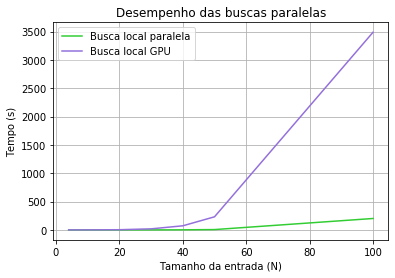

In [23]:
directory_name = "Teste4"

tamanhos = [4, 5, 7, 9, 20, 30, 40, 50, 100]#, 300]
'''
for i in range(1):
    filename = 'in-' + str(i) + '.txt'
    saida = roda_com_entrada(executBlp, os.path.join(directory_name, filename))
    tempoBlp.append(saida[1])
    #resultadosBlp.append(saida[0])
    saida = roda_com_entrada(executBlg, os.path.join(directory_name, filename))
    tempoBlg.append(saida[1])
    #resultadosBlg.append(saida[0])
'''
        
plt.plot(tamanhos, tempoBlp, color='limegreen', label='Busca local paralela')
plt.plot(tamanhos, tempoBlg, color='mediumpurple', label='Busca local GPU')

plt.title('Desempenho das buscas paralelas')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste4.png")
plt.grid()
plt.legend()
plt.show()

Este gráfico compara os tempos de execução dos métodos de busca local paralela com o de busca local para GPU com entradas pequenas (4, 5, 7 e 9 cidades), médias (20, 30, 40 e 50 cidades) e grandes (100 cidades). Nele é possível analisar que, para entradas menores do que 10 a diferença nos tempos de execução não parece ser expressiva, mas para as entradas 30, 40, 50 e 100 a busca local para GPU demora siginificativamente mais para retornar um resultado do que a busca local paralela. Sendo assim, valeria mais a pena gastar dinheiro comprando uma CPU com mais cores, do que uma GPU potente.

In [31]:
print("Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s) para buscas paralelas")

df_tempo2 = pd.DataFrame({
    '4 cidades': [tempoBlp[0], tempoBlg[0]],
    '5 cidades': [tempoBlp[1], tempoBlg[1]],
    '7 cidades': [tempoBlp[2], tempoBlg[2]],
    '9 cidades': [tempoBlp[3], tempoBlg[3]],
    '20 cidades': [tempoBlp[4], tempoBlg[4]],
    '30 cidades': [tempoBlp[5], tempoBlg[5]],
    '40 cidades': [tempoBlp[6], tempoBlg[6]],
    '50 cidades': [tempoBlp[7], tempoBlg[7]],
    '100 cidades': [tempoBlp[8], tempoBlg[8]],
    '300 cidades': ['-', '-']},
     index=['Local Paralela', 'Local GPU'])


df_tempo2.transpose()

Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s) para buscas paralelas


,Local Paralela,Local GPU
4 cidades,0.00529032,0.612361
5 cidades,0.00453812,0.572922
7 cidades,0.00465385,0.611098
9 cidades,0.00550768,0.626275
20 cidades,0.0631377,3.60793
30 cidades,0.409674,18.8941
40 cidades,1.76675,72.6196
50 cidades,5.99108,231.34
100 cidades,201.671,3488.95
300 cidades,-,-


## Vale a pena esperar pelo resultado da busca exaustiva?

Não vale a pena esperar pelo resultado da busca exaustiva caso ela tenha sido implementada de forma ingênua, como neste estudo, pois para entradas médias e grandes ela demora mais do que outros métodos que conseguem um resultado igual ou muito próximo ao dela.

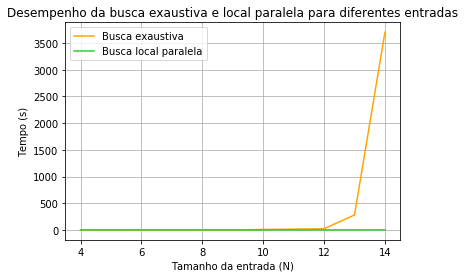

In [32]:
directory_name = "Teste5"

tamanhos = [4, 5, 7, 9, 12, 13, 14]#, 15]

for i in range(1):
    filename = 'in-' + str(i) + '.txt'
    saida = roda_com_entrada(executBe, os.path.join(directory_name, filename))
    tempoBe.append(saida[1])

tempoBlp2 = []
for i in range(len(tamanhos)):
    tempoBlp2.append(tempoBlp[i])


plt.plot(tamanhos, tempoBe, color='orange', label='Busca exaustiva')
plt.plot(tamanhos, tempoBlp2, color='limegreen', label='Busca local paralela')
plt.title('Desempenho da busca exaustiva e local paralela para diferentes entradas')
plt.xlabel('Tamanho da entrada (N)')
plt.ylabel('Tempo (s)')
plt.savefig("Teste5.png")
plt.grid()
plt.legend()
plt.show()

Este gráfico apresenta o tempo de execução necessário para a busca exaustiva encontrar a solução global para diferentes entradas pequenas, em comparação com o tempo que o método da busca local paralela leva para encontrar uma solução para as mesmas entradas. 
Por estarmos usando neste estudo uma implementação ingênua da busca exaustiva, ela demora muito mais para retornar uma solução, ainda em entradas pequenas como a de 12 cidades, do que os outros métodos estudados. Neste caso de implementação ingênua, não vale a pena esperar pelo resultado da busca exaustiva para entradas médias e grandes, porque a busca local paralela, por exemplo, demora muito menos para conseguir um resultado muito próximo ou até igual. Caso a implementação do método de busca exaustiva fosse realizada com a técnica de Branch and Bound, por exemplo, que evita trabalho desnecessário descartando soluções que não tem chance de sucesso antes mesmo de analisá-las por completo, a busca exaustiva apresentaria um tempo de execução significativamente menor para entradas médias e grandes e poderia retornar uma solução ótima global em menos tempo do que os métodos de busca local, por exemplo.

In [33]:
print("Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s) para busca exaustiva e local paralela")

df_tempo3 = pd.DataFrame({
    '4 cidades': [tempoBe[0], tempoBlp[0]],
    '5 cidades': [tempoBe[1], tempoBlp[1]],
    '7 cidades': [tempoBe[2], tempoBlp[2]],
    '9 cidades': [tempoBe[3], tempoBlp[3]],
    '12 cidades': [tempoBe[4], tempoBlp[4]],
    '13 cidades': [tempoBe[5], tempoBlp[5]],
    '13 cidades': [tempoBe[6], tempoBlp[6]]},
     index=['Busca exaustiva', 'Busca local paralela'])


df_tempo3.transpose()

Tabela com dados brutos: Entradas (N) X Tempos de execução dos programas (s) para busca exaustiva e local paralela


,Busca exaustiva,Busca local paralela
4 cidades,0.005311,0.005290
5 cidades,0.005302,0.004538
7 cidades,0.005560,0.004654
9 cidades,0.025764,0.005508
12 cidades,22.526936,0.063138
13 cidades,3703.296271,1.766746
